In [5]:
include("speciale_tools.jl")
import JLD
import PyPlot

In [9]:
coordinate_path = "/home/data/simon/processed/test_areas/vejle_new/coordinates.jld"

data_folder = "/home/data/simon/result/HSBA_loss2/HSBA_vejle"

scalgo_folder = "/home/data/simon/result/scalgo/vejle_1"

"/home/data/simon/result/scalgo/vejle_1"

In [10]:
VV_flood = JLD.load(joinpath(data_folder,"VV_flood_mask.jld"),"data");
VH_flood = JLD.load(joinpath(data_folder,"VV_flood_mask.jld"),"data");
geo_lut = JLD.load(coordinate_path);

In [11]:
geo_lut

Dict{String,Any} with 3 entries:
  "latitude"  => [55.7494 55.7494 … 55.8052 55.8052; 55.7491 55.7492 … 55.805 5…
  "heights"   => [99.7699 99.8741 … 117.555 117.01; 100.784 100.99 … 117.657 11…
  "longitude" => [9.91608 9.91571 … 9.28615 9.28579; 9.916 9.91562 … 9.28608 9.…

In [12]:
rasterio = PyCall.pyimport("rasterio");

In [15]:
flood_tiff = rasterio.open(joinpath(scalgo_folder,"flood_vejle1.tif"));
transform = flood_tiff.get_transform()
rows = collect(1:flood_tiff.height).-1;
columns = collect(1:flood_tiff.width).-1;
tif_lon = transform[1] .+ rows .* transform[2];
tif_lat = transform[4] .+ columns .* transform[6];

In [14]:
transform

6-element Array{Float64,1}:
  9.360337196          
  6.4072031066440545e-6
  0.0                  
 55.749745525          
  0.0                  
 -3.5728099434293048e-6

In [18]:
tif_lat

15322-element Array{Float64,1}:
 55.749745525      
 55.74974195219006 
 55.74973837938011 
 55.749734806570174
 55.74973123376023 
 55.749727660950285
 55.74972408814034 
 55.749720515330395
 55.74971694252046 
 55.74971336971051 
 55.74970979690057 
 55.74970622409062 
 55.74970265128068 
  ⋮                
 55.695045804766096
 55.69504223195616 
 55.69503865914621 
 55.69503508633627 
 55.695031513526324
 55.69502794071638 
 55.69502436790644 
 55.6950207950965  
 55.69501722228655 
 55.69501364947661 
 55.69501007666666 
 55.695006503856725

In [20]:
flood_tiff.meta

Dict{Any,Any} with 8 entries:
  "driver"    => "GTiff"
  "dtype"     => "float32"
  "height"    => 9192
  "nodata"    => -3.40282e38
  "count"     => 1
  "width"     => 15322
  "transform" => (6.4072e-6, 0.0, 9.36034, 0.0, -3.57281e-6, 55.7497, 0.0, 0.0,…
  "crs"       => PyObject CRS.from_epsg(4326)

In [21]:
scalgo_flood = flood_tiff.read(1);

In [23]:
typeof(scalgo_flood), maximum(scalgo_flood), minimum(scalgo_flood)

(Array{Float32,2}, 4.125517f0, -3.4028235f38)

In [27]:
convert(Float64,maximum(scalgo_flood))

4.125516891479492

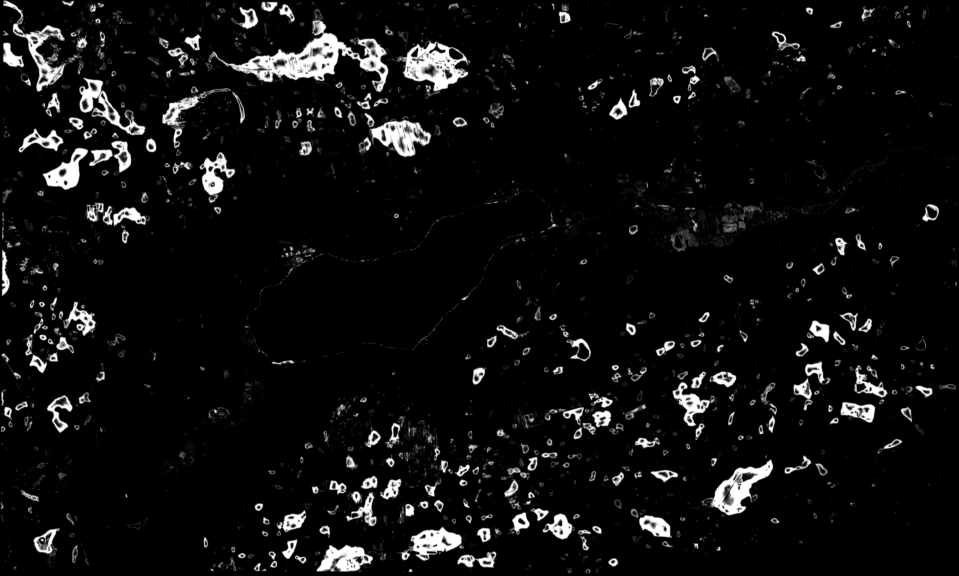

In [34]:
Colors.Gray.(scale_img(scalgo_flood , 0 , 0.01))

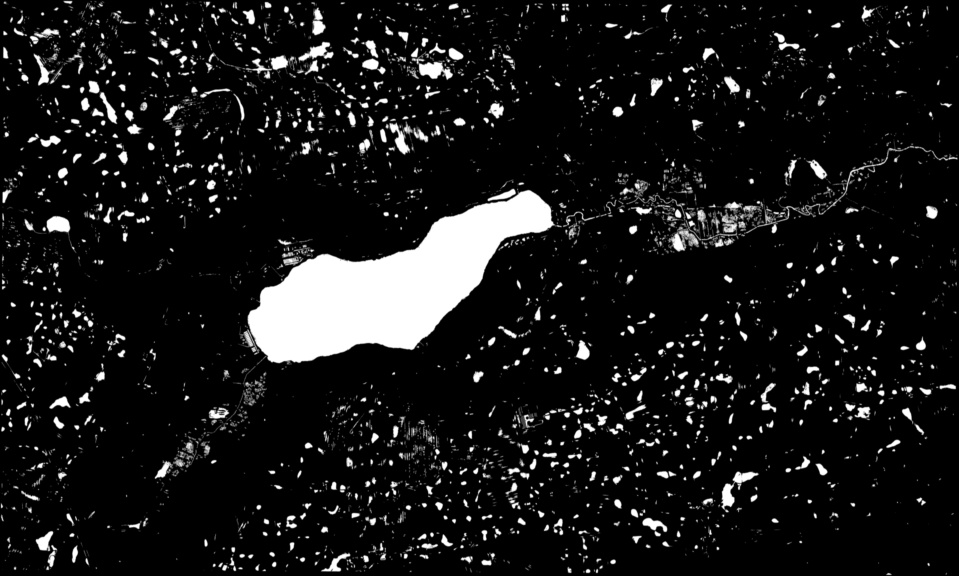

In [37]:
Colors.Gray.((scalgo_flood.<0.015 ).& (scalgo_flood.>-1))

In [38]:
depth_tiff = rasterio.open(joinpath(scalgo_folder,"vanddybde_vejle1.tif"));
transform = depth_tiff.get_transform()
rows = collect(1:depth_tiff.height).-1;
columns = collect(1:depth_tiff.width).-1;
tif_lon2 = transform[1] .+ rows .* transform[2];
tif_lat2 = transform[4] .+ columns .* transform[6];

In [43]:
scalgo_depth = depth_tiff.read(1);

In [44]:
typeof(scalgo_depth), maximum(scalgo_depth), minimum(scalgo_depth)

(Array{Float32,2}, 2.5136719f0, -3.4028235f38)

In [45]:
size(scalgo_depth), size(scalgo_flood)

((9192, 15322), (9192, 15322))

In [47]:
Statistics.mean(abs.(tif_lat2 .-tif_lat))

0.0

In [50]:
depth_tiff.meta

Dict{Any,Any} with 8 entries:
  "driver"    => "GTiff"
  "dtype"     => "float32"
  "height"    => 9192
  "nodata"    => -3.40282e38
  "count"     => 1
  "width"     => 15322
  "transform" => (6.4072e-6, 0.0, 9.36034, 0.0, -3.57281e-6, 55.7497, 0.0, 0.0,…
  "crs"       => PyObject CRS.from_epsg(4326)

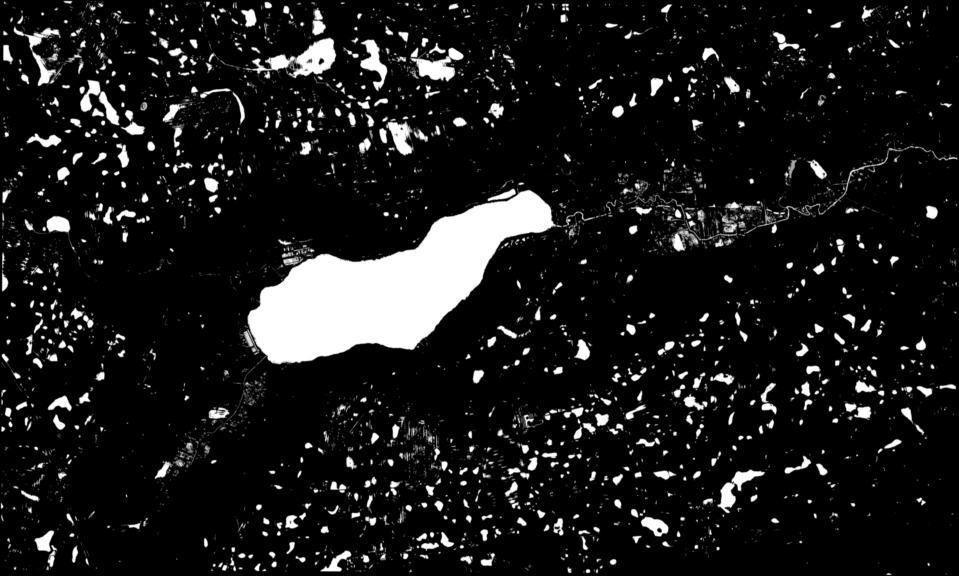

In [52]:
Colors.Gray.(scale_img(scalgo_depth , 0 , 0.03))

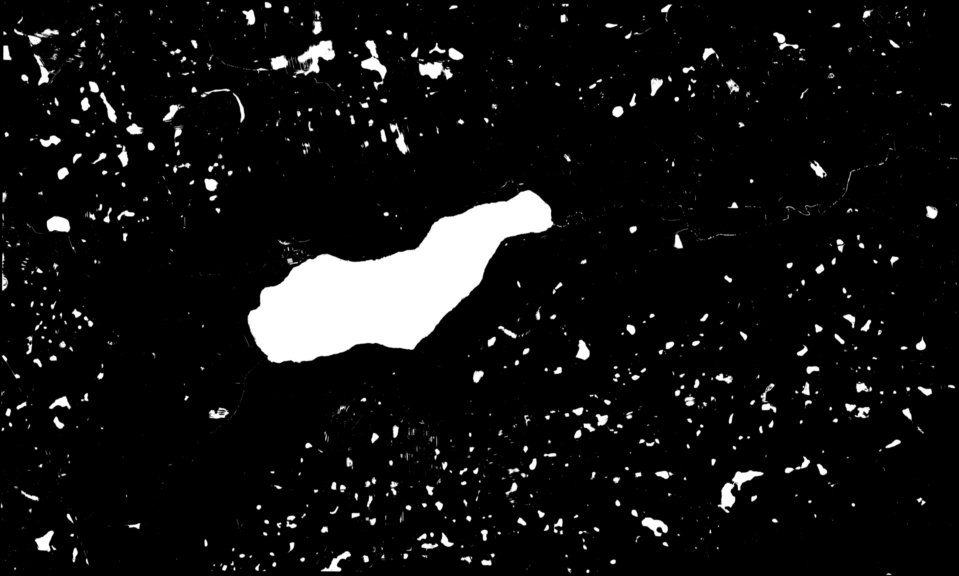

In [58]:
Colors.Gray.(scalgo_depth .> 0.15)

In [59]:
lakes_tiff = rasterio.open(joinpath(scalgo_folder,"geo_dk_lakes_vejle1.tif"));
transform = lakes_tiff.get_transform()
rows = collect(1:lakes_tiff.height).-1;
columns = collect(1:lakes_tiff.width).-1;
tif_lon3 = transform[1] .+ rows .* transform[2];
tif_lat3 = transform[4] .+ columns .* transform[6];

In [60]:
scalgo_lakes = lakes_tiff.read(1);

In [61]:
typeof(scalgo_lakes ), maximum(scalgo_lakes ), minimum(scalgo_lakes )

(Array{Int16,2}, 1, -9999)

In [62]:
lakes_tiff.meta

Dict{Any,Any} with 8 entries:
  "driver"    => "GTiff"
  "dtype"     => "int16"
  "height"    => 9192
  "nodata"    => -9999.0
  "count"     => 1
  "width"     => 15322
  "transform" => (6.4072e-6, 0.0, 9.36034, 0.0, -3.57281e-6, 55.7497, 0.0, 0.0,…
  "crs"       => PyObject CRS.from_epsg(4326)

In [64]:
size(scalgo_depth), size(scalgo_flood), size(scalgo_lakes)

((9192, 15322), (9192, 15322), (9192, 15322))

In [66]:
Statistics.mean(abs.(tif_lon3 .-tif_lon))


0.0

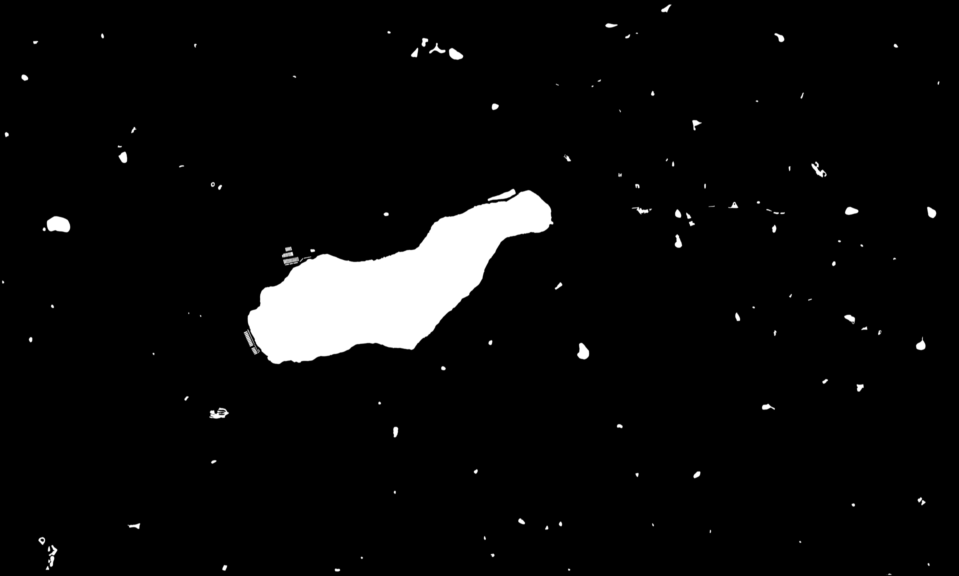

In [68]:
Colors.Gray.(scalgo_lakes .> 0)